# Figure 2: OIB magnetic basement tied to ANTOSTRAT seismic basement 
This notebook produces figure 2 of Tankersley et al. 2022. The figure shows the Werner deconvolution solutions and resulting magnetic basement depths, compared to seismic basement depths, for OIB flight 403, segment 1, in the Ross Sea.

In [19]:
# import necessary python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import os

In [6]:
# all file paths assume this notebook is in /RIS_basement_sediment/figures
pwd = os.getcwd()
pwd

'C:\\Users\\matthewt\\Documents\\Python_Scripts\\RIS_basement_sediment\\Figures'

## Load data
output from *Tankersley2020_GRL.ipynb*

In [20]:
oib_mag = pd.read_csv("../data/results/oib_mag403.3.csv", header=0, index_col=None,sep=',')
oib = pd.read_csv("../data/results/oib403.3.csv", header=0, index_col=None,sep=',')
oib_basement = pd.read_csv("../data/results/oib_basement403.3.csv", header=0, index_col=None,sep=',')

## Make figure

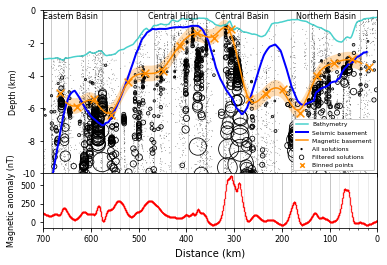

In [21]:
# initialize the figure
fig = plt.figure()
gs = gridspec.GridSpec(2,1, height_ratios=[3,1])
ax0 = fig.add_subplot(gs[0])

#vertical lines of bin size
ax0.vlines(oib.Distance_36k.unique(),ymin=-10000, ymax=0, color='k', linewidth=1).set_alpha(.2)    

# bedmap2 bathymetry
ax0.plot(oib.Distance, oib.bedmap2_bed, 
         c='mediumturquoise', linewidth=1.5, label='Bathymetry')

# ANTOSTRAT basement  
ax0.plot(oib.Distance,oib.ANTOSTRAT_basement,  
         c='blue', linewidth=2, label='Seismic basement')

# interpolated OIB basement
ax0.plot(oib_basement.Distance, oib_basement.filt_clip, 
         c='darkorange', 
         label='Magnetic basement')

# uncertainty bounds
error=480
ax0.fill_between(oib_basement.Distance, 
                 oib_basement.filt_clip-error, 
                 oib_basement.filt_clip+error,
                 facecolor='darkorange', alpha=.3)
       
# OIB Werner dike solutions
ax0.scatter(oib.Distance, oib.Depth, 
            s = 1.5, marker='.', edgecolor='none', facecolor='k', 
            label='All solutions')

# OIB filtered solutions, scaled by Susc
ax0.scatter(oib.Distance[oib.Depth_36k.notna()], 
            oib.Depth_36k[oib.Depth_36k.notna()],
            s = oib[oib.Depth_36k.notna()].Susc*3, 
            marker='o', edgecolors='k', facecolors='none', 
            linewidth=.8, label='Filtered solutions')

# binned OIB basement solutions
ax0.scatter(oib_basement.Distance[oib_basement.binned==1], 
            oib_basement.Depth_36k[oib_basement.binned==1],
            marker='x', c='darkorange', s=60, zorder=15, 
            label='Binned points')

# OIB magnetics    
ax1 = fig.add_subplot(gs[1], sharex=ax0)

ax1.scatter(oib_mag.Distance, oib_mag.Mag_anom_draped_1000, 
            s=.05, c='r', label='ROSETTA')
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")   

#### SET TICKS / LIMITS    
ax1.set_xlim(oib.Distance.max(), oib.Distance.min()) 
ax1.set_xticks(np.arange(oib.Distance.min(), oib.Distance.max(), 100000))
ax1.set_xticklabels(np.arange(0, int((oib.Distance.max())/1000), 100))
ax1.set_xticks(np.arange(0, int((oib.Distance.max())), 20000), minor=True)
ax1.tick_params(axis='both', labelsize=8)
ax0.tick_params(axis='both', labelsize=8)

ax0.set_ylim(-10000, 0)
ax0.set_yticks((-10000, -8000, -6000, -4000, -2000, 0))
ax0.set_yticklabels((-10, -8, -6, -4, -2, 0))

ax1.set_axisbelow(True)
ax1.grid(axis='x', which='major', alpha=0.8)
ax1.grid(axis='x', which='minor', alpha=0.3)
ax0.set_ylabel('Depth (km)', size=8)
ax1.set_ylabel('Magnetic anomaly (nT)', size=8)
ax1.set_xlabel('Distance (km)')
lgnd = ax0.legend(loc='lower right', fontsize=6, markerscale=4,framealpha=1)
lgnd.legendHandles[-3]._sizes = [20]
lgnd.legendHandles[-2]._sizes = [20]
lgnd.legendHandles[-1]._sizes = [20]

ax0.text(x=700000, y=-500, s='Eastern Basin', fontsize=8)
ax0.text(x=480000, y=-500, s='Central High', fontsize=8)
ax0.text(x=340000, y=-500, s='Central Basin', fontsize=8)
ax0.text(x=170000, y=-500, s='Northern Basin', fontsize=8)

fig.subplots_adjust(hspace=0)
ax0.tick_params(axis='x', which='both', labelbottom=False) # remove tick labels
# fig.show()

## Save figure

In [ ]:
out='outputs/FigS2_OIB_403_3.jpg'
fig.savefig(out, dpi=200)